Content and sources: 

Video: https://youtu.be/H6du_pfuznE?si=G0GlbE1tsktu99Mr <br>
https://youtu.be/PuZY9q-aKLw?si=UXW3NwL_Av8AB6Ng <br>
https://youtu.be/1O_BenficgE?si=y7cWQT8x-8SCk-Lq <br>
Article: https://towardsdatascience.com/lstm-by-example-using-tensorflow-feb0c1968537 <br>
         https://www.geeksforgeeks.org/long-short-term-memory-lstm-rnn-in-tensorflow/ <br>
Data: https://www.wsj.com/market-data/quotes/index/IN/NATIONAL%20STOCK%20EXCHANGE%20OF%20INDIA/NIFTY50/historical-prices <br>
Example: https://github.com/lilianweng/stock-rnn <br>


In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

Input the the required data in the below cell: <br>
For example: company= Stock of Company whose stocks you want to analyse <br>
Period= Duration of Analysis Period <br>
Time Step=Number of days to be analyses for the prediction of next day <br>
Cell Count= Number of LSTM Cells in each layer, initialised to be the number of features but input any preferred value <br>

In [2]:
company='^NSEI'
start_date=2022-1-1
end_date=2024-1-1
period='2y'
time_step = 20
cell_count=time_step
epochs=200
batch_size=64

In [3]:
data=yf.Ticker(company)
data=data.history(period=period)

In [4]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-07-04 00:00:00+05:30,15710.500000,15852.349609,15661.799805,15835.349609,304300,0.0,0.0
2022-07-05 00:00:00+05:30,15909.150391,16025.750000,15785.450195,15810.849609,254200,0.0,0.0
2022-07-06 00:00:00+05:30,15818.200195,16011.349609,15800.900391,15989.799805,288400,0.0,0.0
2022-07-07 00:00:00+05:30,16113.750000,16150.500000,16045.950195,16132.900391,264600,0.0,0.0
2022-07-08 00:00:00+05:30,16273.650391,16275.500000,16157.900391,16220.599609,281100,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-27 00:00:00+05:30,23881.550781,24087.449219,23805.400391,24044.500000,515200,0.0,0.0
2024-06-28 00:00:00+05:30,24085.900391,24174.000000,23985.800781,24010.599609,354800,0.0,0.0
2024-07-01 00:00:00+05:30,23992.949219,24164.000000,23992.699219,24141.949219,0,0.0,0.0


In [5]:
stocks=data.copy()
stocks.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'])

,Close
Date,
2022-07-04 00:00:00+05:30,15835.349609
2022-07-05 00:00:00+05:30,15810.849609
2022-07-06 00:00:00+05:30,15989.799805
2022-07-07 00:00:00+05:30,16132.900391
2022-07-08 00:00:00+05:30,16220.599609
...,...
2024-06-27 00:00:00+05:30,24044.500000
2024-06-28 00:00:00+05:30,24010.599609
2024-07-01 00:00:00+05:30,24141.949219


Text(0.5, 1.0, 'Close Prices vs Date for ^NSEI')

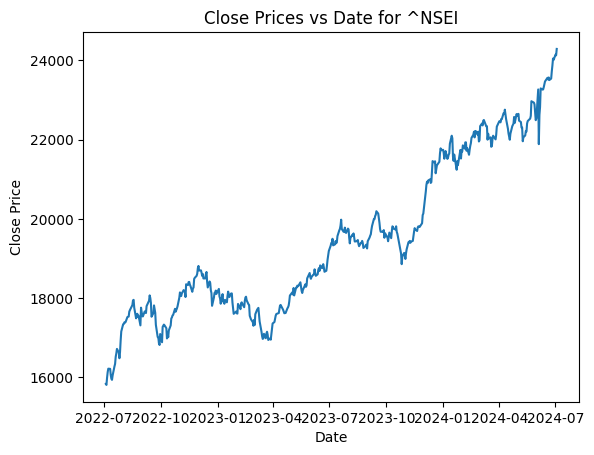

In [6]:
import matplotlib.pyplot as plt 

plt.plot(stocks.index, stocks['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title(f'Close Prices vs Date for {company}') 

In [7]:
close=stocks['Close']

In [8]:
#Scaling the dataset because LSTM is sensitive to scale

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
close=scaler.fit_transform(np.array(close).reshape(-1,1))
close

array([[0.00289063],
       [0.        ],
       [0.02111345],
       [0.03799718],
       [0.04834437],
       [0.04780169],
       [0.02919542],
       [0.01838216],
       [0.01507858],
       [0.0281218 ],
       [0.05517575],
       [0.0624967 ],
       [0.08376938],
       [0.09372737],
       [0.10720117],
       [0.09676548],
       [0.07940394],
       [0.09803981],
       [0.13199577],
       [0.1589731 ],
       [0.18042287],
       [0.18105981],
       [0.18609791],
       [0.18537225],
       [0.18720102],
       [0.20225586],
       [0.20339447],
       [0.21805411],
       [0.22267327],
       [0.23766912],
       [0.25170934],
       [0.25315466],
       [0.22978763],
       [0.19819713],
       [0.20843833],
       [0.21167692],
       [0.20194316],
       [0.20624385],
       [0.17721953],
       [0.2298881 ],
       [0.20434434],
       [0.2039489 ],
       [0.2188565 ],
       [0.21765291],
       [0.21397187],
       [0.23454252],
       [0.23862476],
       [0.250

In [9]:
#Splitting data into training and test 
training_size=int(len(close)*0.7) #To convert to integer
test_size=len(close)-training_size
train_set=close[0:training_size,:]
test_set=close[training_size:len(close),:]

In [10]:
#Function to create the dataset to input to model
def create_dataset(dataset, time_step=1):
    dataX, dataY=[], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [11]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
X_train, y_train = create_dataset(train_set, time_step)
X_test, y_test = create_dataset(test_set, time_step)

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((323, 20), (323,), (127, 20), (127,))

In [13]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print(X_train.shape, X_test.shape)

(323, 20, 1) (127, 20, 1)


In [14]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [15]:
#Training the model
model = Sequential()
model.add(LSTM(cell_count, return_sequences=True, input_shape=(time_step, 1)))
#model.add(Dropout(0.2))  # Dropout for regularization
model.add(LSTM(cell_count, return_sequences=True))
#model.add(Dropout(0.2))
#model.add(LSTM(cell_count, return_sequences=True))--- very bad result with this layer also
model.add(LSTM(cell_count))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

C:\Users\suman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 20, 20)              │           1,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 20, 20)              │           3,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 20)                  │           3,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,341 (32.58 KB)

 Trainable params: 8,341 (32.58 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0812
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0190
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0105
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0053
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0049
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0045
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0032
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0031
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0030
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0028 
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0023
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0023
Epoch 13/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0022
Epoch 14/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0020
Epoch 15/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020 
Epoch 16/200
6/6 ━━

In [18]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [19]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
y_train=scaler.inverse_transform(y_train.reshape(-1,1))
test_predict=scaler.inverse_transform(test_predict)
y_test=scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_predict, y_train

(array([[16937.139],
        [17026.531],
        [17129.22 ],
        [17234.014],
        [17327.87 ],
        [17403.303],
        [17466.082],
        [17515.777],
        [17561.348],
        [17604.53 ],
        [17652.543],
        [17710.285],
        [17771.266],
        [17809.982],
        [17801.105],
        [17762.312],
        [17711.37 ],
        [17653.791],
        [17601.129],
        [17538.506],
        [17508.008],
        [17492.05 ],
        [17485.736],
        [17495.516],
        [17516.057],
        [17539.059],
        [17574.076],
        [17619.06 ],
        [17675.207],
        [17745.904],
        [17814.656],
        [17860.969],
        [17852.346],
        [17809.555],
        [17767.201],
        [17726.213],
        [17683.793],
        [17619.195],
        [17517.48 ],
        [17398.426],
        [17269.518],
        [17146.76 ],
        [17060.625],
        [16999.354],
        [16985.4  ],
        [17014.914],
        [17071.957],
        [1713

In [21]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

train_mse=math.sqrt(mean_squared_error(y_train,train_predict))
test_mse=math.sqrt(mean_squared_error(y_test,test_predict))
print(f'MSE on Training Set= {train_mse}, and its root= {math.sqrt(train_mse)}')
print(f'Mse on Test Set= {test_mse}, and its root= {math.sqrt(test_mse)}')

train_mae = mean_absolute_error(y_train, train_predict)
test_mae = mean_absolute_error(y_test, test_predict)
print(f'MAE on Training= {train_mae}')
print(f'MAE on Test= {test_mae}')

MSE on Training Set= 259.5971615408469, and its root= 16.112019163992045
Mse on Test Set= 311.93185871311636, and its root= 17.661592756971732
MAE on Training= 220.04239430147058
MAE on Test= 261.3861189714567


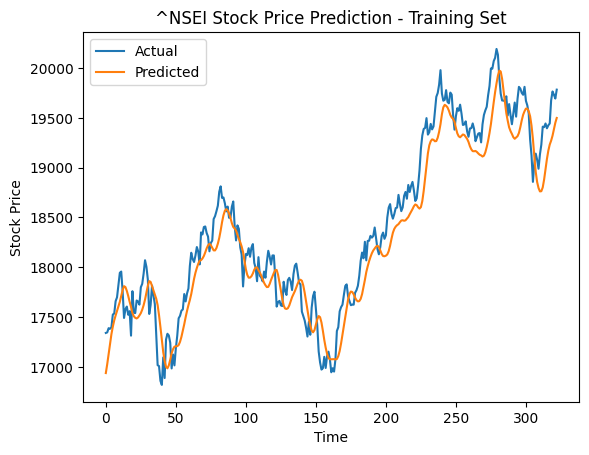

In [22]:
plt.plot(y_train, label='Actual')
plt.plot(train_predict, label='Predicted')
plt.title(f'{company} Stock Price Prediction - Training Set')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

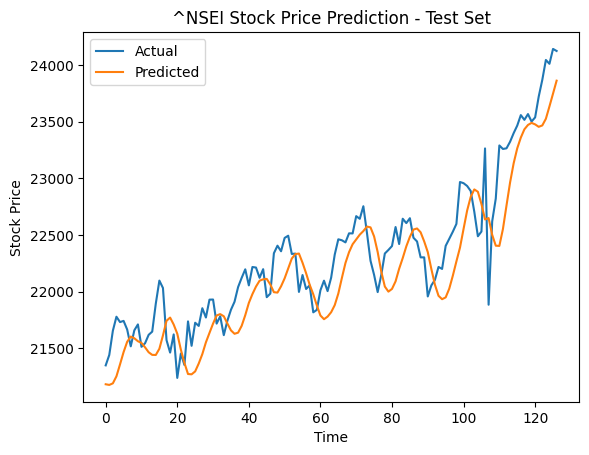

In [23]:
plt.plot(y_test, label='Actual')
plt.plot(test_predict, label='Predicted')
plt.title(f'{company} Stock Price Prediction - Test Set')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [24]:
model.save('lstm_without_dropout.keras')